# Weighted ECM clustering
## Toys dataset - 2 clusters, 2 dimensions


In [74]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential, ev_plot_2D
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

In [75]:
def __credal_partition_contour_lines(model, X, marker_list):
    mass = model['mass']
    clusters = np.argmax(mass, axis=1)
    contour_list = np.array([])
    datapoint_list = []
    for i in range(mass.shape[1]):
        indices = np.where(clusters == i)
        datapoints = X[indices]
        if len(datapoints) > 3:
            datapoint_list.append(datapoints)
            memberships = mass[indices, i].ravel()
            contour = plt.tricontourf(datapoints[:, 0], datapoints[:, 1], memberships, cmap='viridis', alpha=0.6)
            contour_list = np.append(contour_list, contour)
    
    plt.colorbar(contour_list[0], label='Mass value')
    
    for i in range(len(marker_list)):
        datapoints = datapoint_list[i]
        plt.scatter(datapoints[:, 0], datapoints[:, 1], marker=marker_list[i], s=20)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Credal partition')
    plt.show()

Instances 199 - Features 2 - Class 2
          0         1
0  3.679998  2.858254
1  3.057583  3.293152
2  3.036594  2.762200
3  2.192858  3.253155
4  3.641636  3.465976


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


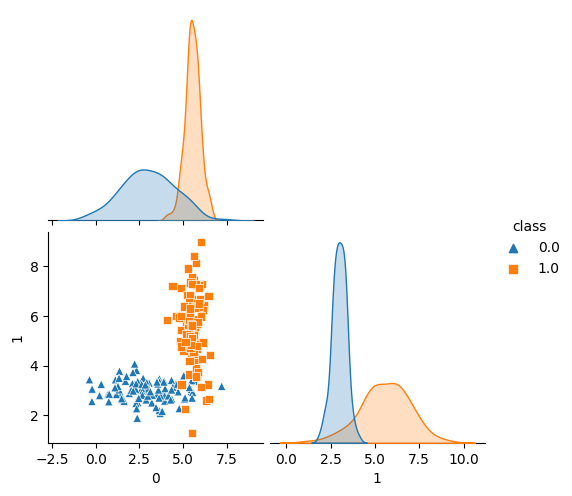

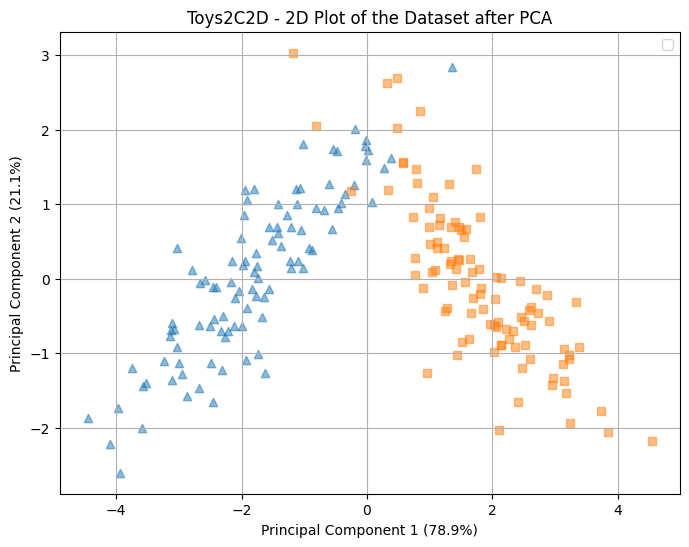

In [76]:
## Generating data set
df_wt_label = pd.read_csv('../../src/evclust/datasets/2c2dDataset_2.csv')
dataset = df_wt_label.values
X = pd.DataFrame(dataset[:, :-1])
y = pd.DataFrame(dataset[:, -1])
c = 2

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's']
plotting(X, y, "Toys2C2D", matrix_plot=True, markers=markers)

# Normalization
scaler = MinMaxScaler((0,1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [77]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None", epsi=1e-5)
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x : x['crit'])

J values: [4.355932669800354, 4.3559371772422235, 4.355937204126217, 4.355938127835704, 4.355938757818987, 4.355938841107174, 4.355939790024684, 4.355941149185406, 4.355941707855482, 4.3559419622112765]
ARI values: [0.7900593297725267, 0.7900593297725267, 0.7900593297725267, 0.7900593297725267, 0.7900593297725267, 0.7900593297725267, 0.7900593297725267, 0.7900593297725267, 0.7900593297725267, 0.7900593297725267]
NS values: [0.9001015790726181, 0.899903113988667, 0.8500775446114093, 0.8998764994462574, 0.8501168538464184, 0.8501187913253897, 0.8501399162762625, 0.8495705993643112, 0.8501783638045266, 0.8495556704361978]
NMI values: [0.6993955543850195, 0.6993955543850195, 0.6993955543850197, 0.6993955543850195, 0.6993955543850197, 0.6993955543850197, 0.6993955543850197, 0.6993955543850197, 0.6993955543850197, 0.6993955543850197]


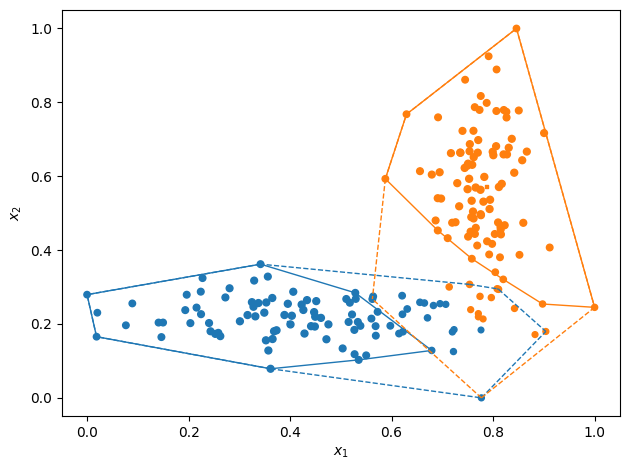

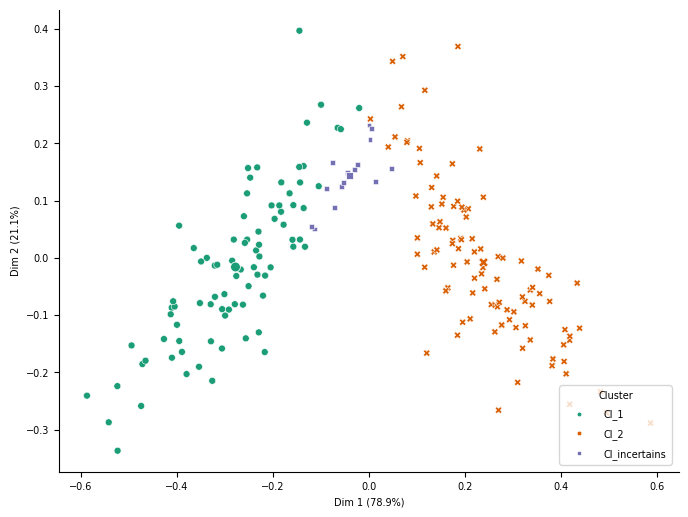

In [78]:
display_results_evidential(X, ecm_models, numeric_labels)

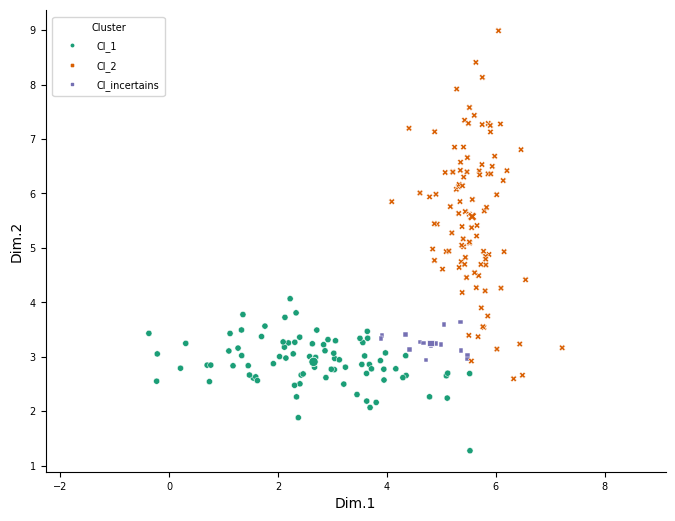

In [79]:
ev_plot_2D(data=dataset[:, :-1], x=ecm_models[0], normalize=False, cex=20)

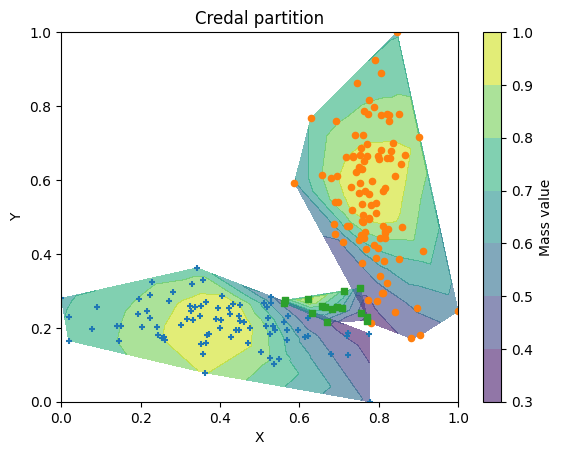

In [80]:
__credal_partition_contour_lines(ecm_models[0], X.values, ['+', 'o', 's'])

## Weighted ECM (WECM)

In [103]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None", stopping_factor="center")
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])


J values: [0.38650775845460006, 0.38680440528539795, 0.38680851128239646, 0.38681856481846644, 0.3868203588499591, 0.3869244860352782, 0.3974776460208481, 0.4125575298471253, 0.4126818606620529, 0.4127049308618734]
ARI values: [0.8448772116343112, 0.8264003673094582, 0.8264003673094582, 0.8264003673094582, 0.8264003673094582, 0.8264003673094582, 0.8264003673094582, 0.7545255309119626, 0.7721892494972468, 0.7721892494972468]
NS values: [0.8958574590587033, 0.8953720661305893, 1.0254167845269158, 0.8936624921792162, 1.0252302352938563, 1.025422130779381, 0.7081548630597098, 0.9136522852183905, 1.0661475219382999, 0.9131591770797195]
NMI values: [0.7585246718056851, 0.7346196970902636, 0.7346196970902638, 0.7346196970902636, 0.7346196970902638, 0.7346196970902638, 0.7346196970902638, 0.6539946445887813, 0.6724333801746438, 0.6724333801746438]


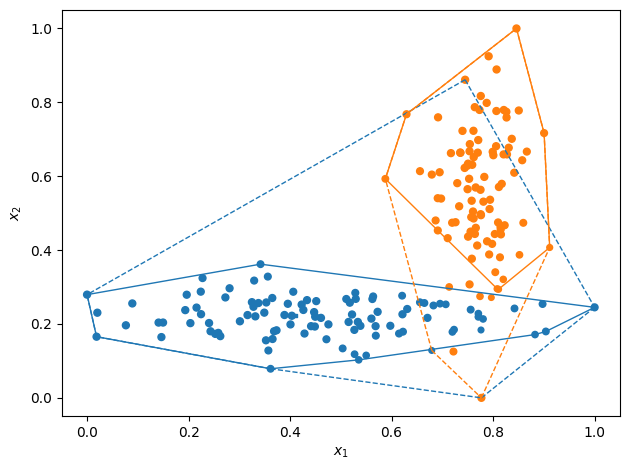

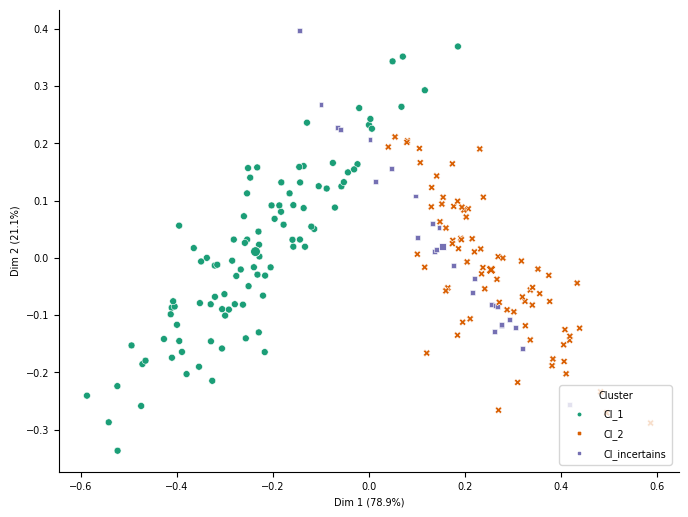

In [104]:
display_results_evidential(X, wecm_models, numeric_labels)

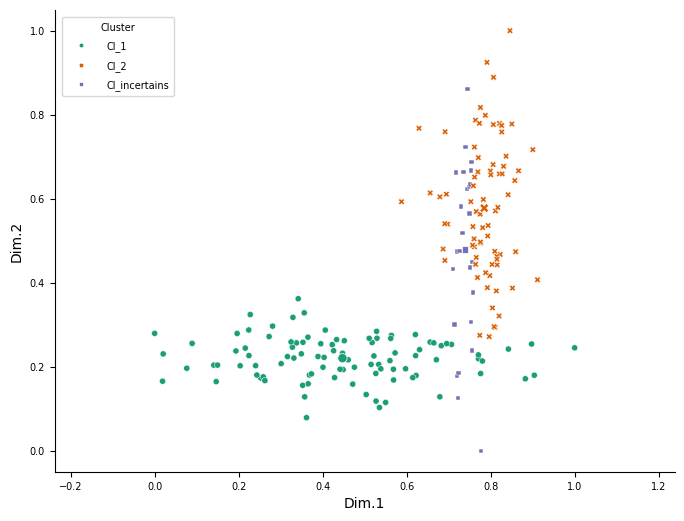

In [105]:
ev_plot_2D(data=X.values, x=wecm_models[0], normalize=False, cex=20)

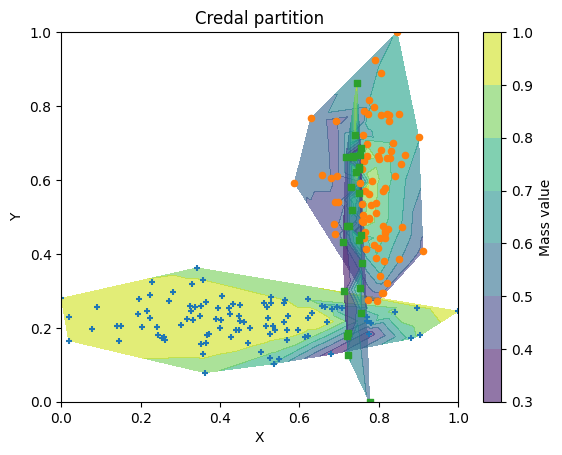

In [106]:
__credal_partition_contour_lines(wecm_models[0], X.values, ['+', 'o', 's'])

In [107]:
print(f"Top weights: {wecm_models[0]['W']}")
centers = wecm_models[0]['gplus']
print(f"Top centers: {centers}")
# plt.figure(figsize=(8, 6))
# plt.scatter(centers[:, 0], centers[:, 1], s=200)
# plt.show()

Top weights: [[0.05676817 0.94323183]
 [0.88874613 0.11125387]
 [0.98609571 0.01390429]]
Top centers: [[0.41105916 0.22337472]
 [0.7659237  0.57508716]
 [0.74458897 0.26020404]]


# Weighted FCM - Keller et al. 2000

In [86]:
%%capture
keller_models = np.array([])
w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, w0=w0, init="None", verbose=True)
    keller_models = np.append(keller_models, model)

J values: [0.448465379614245, 0.44850227097992396, 0.44847846735903807, 0.44849371274081656, 0.44849716883617063, 0.44847258921379324, 0.4484952596988685, 0.4484754242026912, 0.4485038277016218, 0.4484919452859131]
ARI values: [0.8264003673094582, 0.8264003673094582, 0.8264003673094582, 0.8264003673094582, 0.8264003673094582, 0.8264003673094582, 0.8264003673094582, 0.8264003673094582, 0.8264003673094582, 0.8264003673094582]
NMI values: [0.7346196970902636, 0.7346196970902636, 0.7346196970902636, 0.7346196970902636, 0.7346196970902636, 0.7346196970902636, 0.7346196970902638, 0.7346196970902636, 0.7346196970902638, 0.7346196970902636]


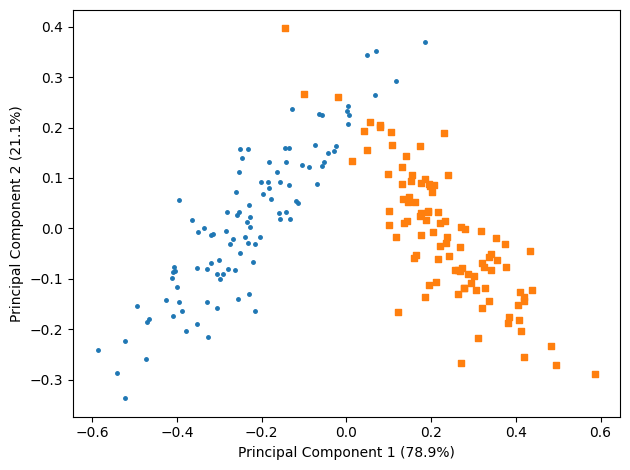

In [87]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [88]:
%%capture
wang_models = np.array([])
for i in range(5):
    model = fcm_wang2004(X, c, w_beta=3.2, verbose=True, init="None")
    wang_models = np.append(wang_models, model)

J values: [1.3884176166175628, 1.3882617013086174, 1.3881803381791513, 1.3884924848056124, 1.3882635551102047]
ARI values: [0.7900593297725267, 0.7900593297725267, 0.7900593297725267, 0.7900593297725267, 0.7900593297725267]
NMI values: [0.6993955543850195, 0.6993955543850197, 0.6993955543850195, 0.6993955543850197, 0.6993955543850197]


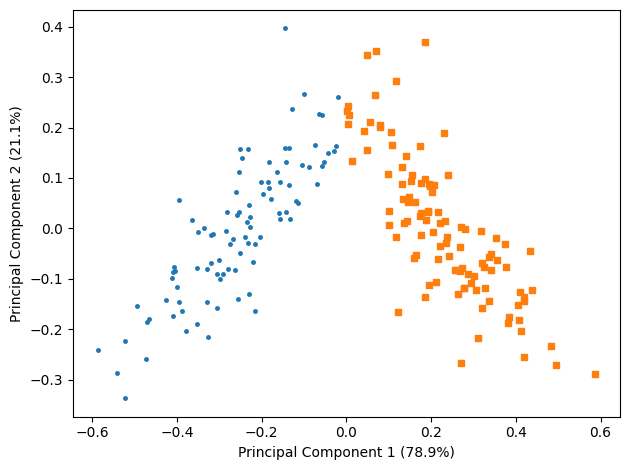

In [89]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [90]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, init="None", epsilon=1e-5)
    scad1_models = np.append(scad1_models, model)

J values: [6.7270772599217885, 6.726874199373119, 6.727054927995066, 6.7270751170905445, 6.727076310851539, 6.727022989303563, 6.727076670641086, 6.7270766656049314, 6.727077995358994, 6.727053651042792]
ARI values: [0.7900593297725267, 0.7900593297725267, 0.7900593297725267, 0.7900593297725267, 0.7900593297725267, 0.7900593297725267, 0.7900593297725267, 0.7900593297725267, 0.7900593297725267, 0.7900593297725267]
NMI values: [0.6993955543850195, 0.6993955543850197, 0.6993955543850195, 0.6993955543850197, 0.6993955543850195, 0.6993955543850195, 0.6993955543850197, 0.6993955543850195, 0.6993955543850195, 0.6993955543850197]


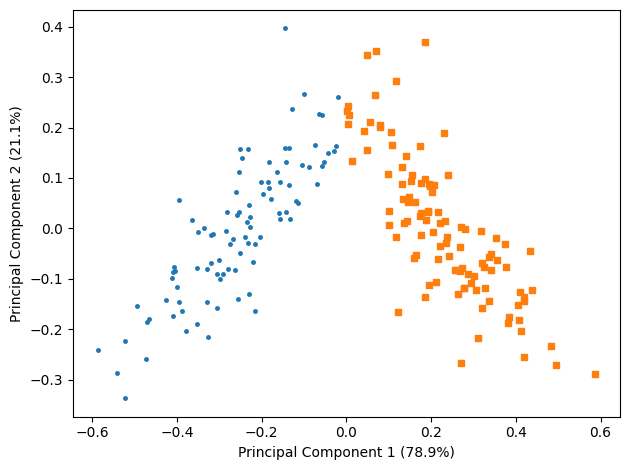

In [91]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [92]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True, init="None", epsilon=1e-5)
    scad2_models = np.append(scad2_models, model)

J values: [0.46767429499736374, 0.4676926836863201, 0.4676920911556587, 0.4676775175086223, 0.4676773119485029, 0.46768974179945433, 0.46769297233370183, 0.46767654438618783, 0.4676767400930743, 0.46769276959401523]
ARI values: [0.826400898681057, 0.826400898681057, 0.826400898681057, 0.826400898681057, 0.826400898681057, 0.826400898681057, 0.826400898681057, 0.826400898681057, 0.826400898681057, 0.826400898681057]
NMI values: [0.7377116886710454, 0.7377116886710454, 0.7377116886710454, 0.7377116886710454, 0.7377116886710454, 0.7377116886710454, 0.7377116886710454, 0.7377116886710454, 0.7377116886710454, 0.7377116886710454]


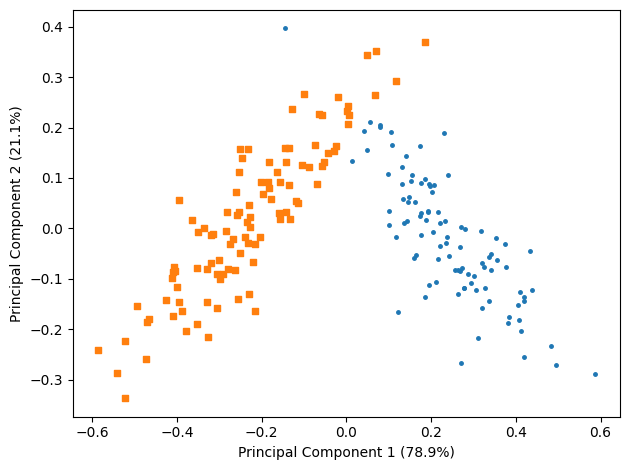

In [93]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [94]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True, init="None")
    ifwfcm_models = np.append(ifwfcm_models, model)

J values: [1.3160939775004428, 1.3774003273827093, 1.310264378900042, 1.376681744965489, 1.3156782269137444, 1.3159948867323856, 1.3161936012966402, 1.3158271651626423, 1.3158008491785367, 1.3095173584053863]
ARI values: [0.7722038919938051, 0.702789940381704, 0.7722038919938051, 0.6859453630848362, 0.7722038919938051, 0.7722038919938051, 0.7722038919938051, 0.7722038919938051, 0.7722038919938051, 0.7722038919938051]
NMI values: [0.7278532602859794, 0.669268815835139, 0.7278532602859793, 0.6557837645356629, 0.7278532602859793, 0.7278532602859793, 0.7278532602859793, 0.7278532602859793, 0.7278532602859794, 0.7278532602859793]


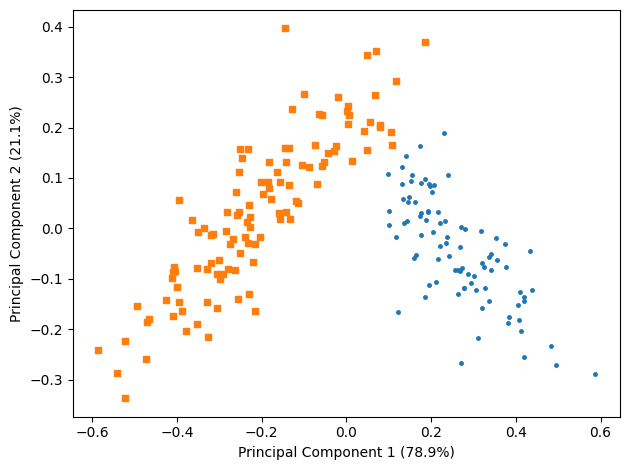

In [95]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [96]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, init="None")
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)

J values: [18.780155245016687, 18.77986900238747, 18.780064461103464, 18.779737131567252, 18.779825362877162, 18.779782204522974, 18.780281769386814, 18.780152016819958, 18.780388237661455, 18.779731189880245]
ARI values: [0.7198341163328079, 0.7198341163328079, 0.7198341163328079, 0.7198341163328079, 0.7198341163328079, 0.7198341163328079, 0.7198341163328079, 0.7198341163328079, 0.7198341163328079, 0.7198341163328079]
NMI values: [0.6834334767022349, 0.6834334767022349, 0.6834334767022349, 0.6834334767022349, 0.6834334767022349, 0.6834334767022349, 0.6834334767022349, 0.6834334767022349, 0.6834334767022349, 0.6834334767022349]


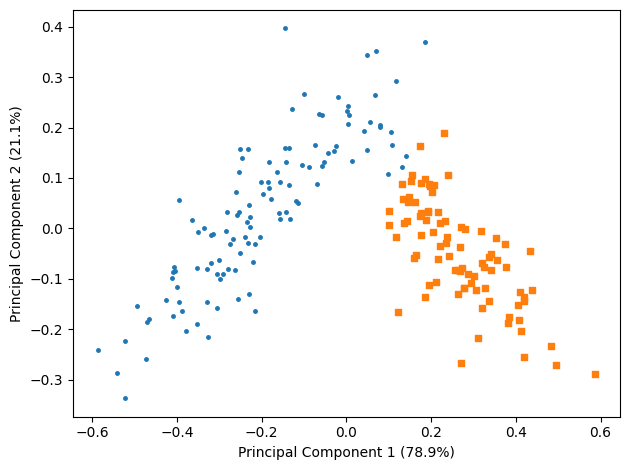

In [97]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)